Code Math Derivations: Symbolic Gradients Ramp-Up (45-60 mins): Build on Day 2's basics—start simple, then multivariable. Use SymPy to derive gradients symbolically; this preps for AI-scale ops like optimizing embeddings.
Basic univariate: Define a function and compute its derivative.

In [2]:
import sympy as sp
import numpy as np
import torch
import matplotlib.pyplot as plt

x = sp.symbols('x')
f = x**2 + sp.sin(x)
df = sp.diff(f, x)
print("Derivative:", df)  # Output: 2*x + cos(x)
# Evaluate numerically
print("Eval", df.subs(x, 1).evalf())

Derivative: 2*x + cos(x)
Eval 2.54030230586814


Extend to multivariable (embeddings twist): Think vectors as points in high-dim space.

In [5]:
y = sp.symbols('y')
g = x**2 * y + sp.cos(x * y)  # Multivariable func
dg_dx = sp.diff(g, x)
dg_dy = sp.diff(g, y)
print("Partial wrt x:", dg_dx)  # 2*x*y - sin(x*y)*y
print("Partial wrt y:", dg_dy)  # x**2 - sin(x*y)*x
grad_g = sp.Matrix([dg_dx, dg_dy])
print("Gradient:", grad_g)

Partial wrt x: 2*x*y - y*sin(x*y)
Partial wrt y: x**2 - x*sin(x*y)
Gradient: Matrix([[2*x*y - y*sin(x*y)], [x**2 - x*sin(x*y)]])


AI Edge: Symbolically derive a loss func for embeddings (e.g., MSE between vectors).

In [7]:
vec1, vec2 = sp.symbols('vec1 vec2')  # Placeholder scalars; extend to matrices
loss = (vec1 - vec2)**2
dloss_dvec1 = sp.diff(loss, vec1)
print("Gradient for embedding loss:", dloss_dvec1)  # 2*(vec1 - vec2)

sp.lambdify((vec1, vec2), dloss_dvec1)(3, 1)

Gradient for embedding loss: 2*vec1 - 2*vec2


4

Embedding Simulator

In [8]:
np.random.seed(42)  # Reproducible
embeddings = np.random.randn(100, 5)  # 100 vectors, 5 dims (scale up for realism)
# Or Torch: embeddings = torch.randn(100, 5)

Compute distances: Euclidean and Cosine (core for semantic search in RAG).

In [10]:
from scipy.spatial.distance import euclidean, cosine
dist_euc = euclidean(embeddings[0], embeddings[1])
dist_cos = cosine(embeddings[0], embeddings[1])  # 0=similar, 2=dissimilar
print(f"Euclidean: {dist_euc}, Cosine: {dist_cos}")

np.linalg.norm(embeddings[:, None] - embeddings[None, :], axis=-1)


Euclidean: 2.8410503394788553, Cosine: 1.2033056951320684


array([[0.        , 2.84105034, 3.90183372, ..., 2.86408821, 3.45999278,
        2.9300409 ],
       [2.84105034, 0.        , 3.42585936, ..., 3.81450498, 1.28538593,
        3.49753516],
       [3.90183372, 3.42585936, 0.        , ..., 4.7392964 , 3.95937371,
        1.64680394],
       ...,
       [2.86408821, 3.81450498, 4.7392964 , ..., 0.        , 3.84334867,
        4.06059939],
       [3.45999278, 1.28538593, 3.95937371, ..., 3.84334867, 0.        ,
        3.89250476],
       [2.9300409 , 3.49753516, 1.64680394, ..., 4.06059939, 3.89250476,
        0.        ]])

Visualize: Clusters to intuit patterns.

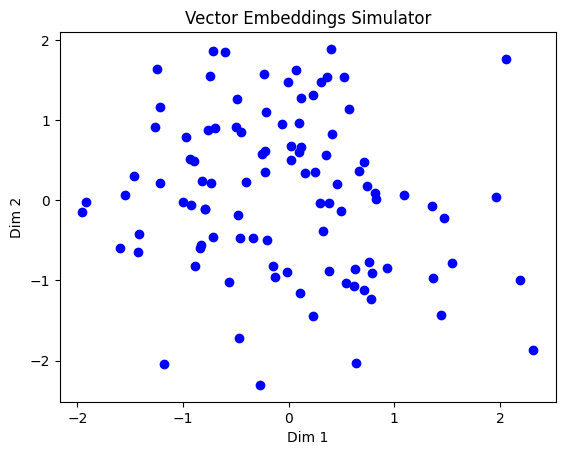

In [11]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c='blue')  # 2D projection
plt.title("Vector Embeddings Simulator")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
plt.show()
# Add lines for distances: plt.plot([embeddings[0,0], embeddings[1,0]], [embeddings[0,1], embeddings[1,1]], 'r--')

Ethics/Responsible AI Integration (20 mins): Quick bias check—simulate embedding bias: Generate skewed vectors (e.g., cluster by "group" labels), compute avg distances between groups. Flag if >threshold in code.

In [12]:
labels = np.array([0]*50 + [1]*50)  # Two groups
intra_dist = np.mean([cosine(embeddings[i], embeddings[j]) for i in range(50) for j in range(50) if i!=j])  # Optimize this!
print("Intra-group cosine dist:", intra_dist)  # Add Fairlearn-style check later phases

Intra-group cosine dist: 1.0128654334962284
